In [1]:
import numpy as np
import scipy as scipy
from scipy.stats import norm
from scipy.stats import poisson
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import random

Try creating a model from scratch, which has a single bin with known background (say b=100), and an unknown signal. The observed number of events N_obs is Poisson distributed, N_obs ~ Poi(lambda), where lambda=mu*s0+b, with `mu` the signal strength parameter and signal reference value of s0=1.
Using 1000 simulated events with b=100 and s=0:
- Create the distribution of muhat
- Create the distribution of the likelihood assuming mu=0
- Create the distribution of the test statistic t=-2ln(L(mu)/L(muhat)), with mu=0

If you still have time then:
- try derive the 95% two-sided confidence intervals for mu

In [2]:
data_samples = 1000
s0 = 1     #nominal signal events = 1

In [3]:
background   = 100.0   
signal   = 0.0  
events = background + signal  
mu    = signal/s0  

lam = mu * s0 + background
observed = poisson.rvs(mu=lam, loc=0.0, size=data_samples)

In [4]:
def likelihood(mu, n, background):
    s0 = 1.0
    signal = mu * s0
    expected_events = signal + background
    likelihood = poisson.pmf(n, mu=events)
    return likelihood

In [5]:
def log_likelihood(mu, n,background):
    s0 = 1
    signal = mu * s0
    expected_events = signal + background
    log_likelihood = poisson.logpmf(n, mu=expected_events)
    return log_likelihood

In [6]:
def log_l_free(x, n, background):
    s0 =1
    mu   = x
    log_likelihood_free = log_likelihood(mu, n, background)
    return log_likelihood_free

In [7]:
def neg_log_l_free(x, n, background):
    mu   = x
    log_likelihood_free = log_likelihood(mu, n, background)
    return -log_likelihood_free

In [8]:
def maximise_LL(n, mu):
    
    fit_result_free = minimize(neg_log_l_free, x0=[1.0], args=(n,background), method='Nelder-Mead')
    
    LL_free = -fit_result_free['fun'] 
    parameter_MLE_free = fit_result_free['x']
    mu_fit_free = parameter_MLE_free[0]

    return (LL_free, mu_fit_free)

In [9]:
max_LL_results = [maximise_LL(n, mu=mu) for n in observed]
max_LL_results = np.array(max_LL_results)

In [10]:
LL_cond = log_likelihood(0,observed,background)

Log likelihood distribution for mu hat

Text(0.5,0,'LL free')

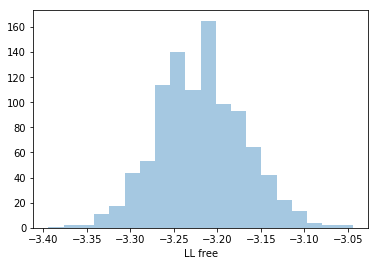

In [11]:
f,a = plt.subplots()
a.hist(max_LL_results[:,0], bins=20, alpha=0.4)
a.set_xlabel("LL free")

log likelihood distribution for mu =0 

Text(0.5,0,'LL cond')

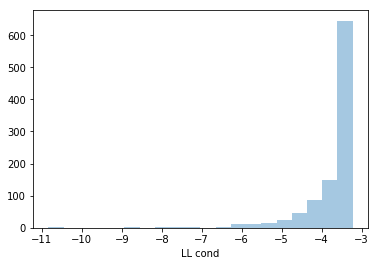

In [12]:
f,a = plt.subplots()
a.hist(LL_cond, bins=20, alpha=0.4)
a.set_xlabel("LL cond")


Text(0.5,0,'$mu hat$')

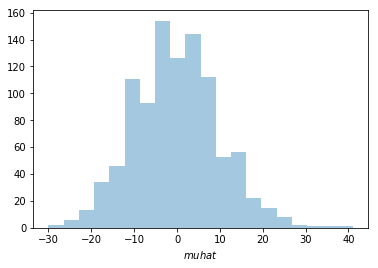

In [13]:
f,a = plt.subplots()
a.hist(max_LL_results[:,1], bins=20, alpha=0.4)
a.set_xlabel("$mu hat$")


In [14]:
LL_free = max_LL_results[:,0]
t = -2.0*(LL_cond - LL_free) 

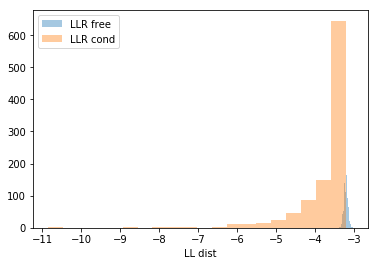

In [15]:
f,a = plt.subplots()
a.hist(LL_free, bins=20, alpha=0.4, label='LLR free')
a.hist(LL_cond, bins=20, alpha=0.4, label='LLR cond')
a.set_xlabel('LL dist')
a.legend()

Text(0.5,0,'$t$')

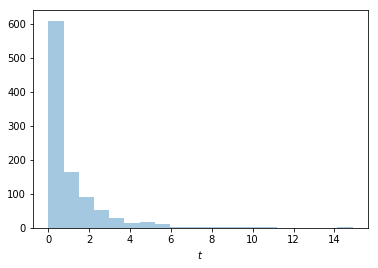

In [16]:
f,a = plt.subplots()
a.hist(t, bins=20, alpha=0.4)
a.set_xlabel("$t$")


Upper limits for mu 

In [17]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m = np.mean(a)
    err = scipy.stats.sem(a)
    h = err * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [18]:
mean_confidence_interval(max_LL_results[:,1], 0.95)

(-0.2329999999999962, -0.8503230402441861, 0.3843230402441937)